# Simple linear regressions
As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using sns.lmplot().

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column 'price' vs the column 'area' from a DataFrame df, you could call:

`sns.lmplot(x='area', y='price', data=df)`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
auto = pd.read_csv('../data/20. Introducción a seaborn/auto.txt')

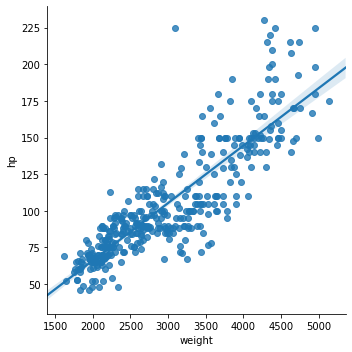

In [8]:
sns.lmplot(x='weight', y='hp', data=auto)
plt.show()

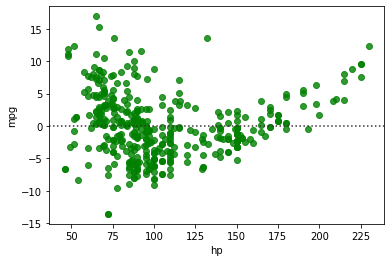

In [9]:
sns.residplot(x='hp', y='mpg', data=auto, color='green')
plt.show()

# Higher-order regressions
When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using sns.regplot() (the function `sns.lmplot()` is a higher-level interface to `sns.regplot()`). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A principal difference between `sns.lmplot()` and `sns.regplot()` is the way in which matplotlib options are passed (`sns.regplot()` is more permissive).
For both `sns.lmplot()` and `sns.regplot()`, the keyword order is used to control the order of polynomial regression.
The function `sns.regplot()` uses the argument scatter=None to prevent plotting the scatter plot points again.

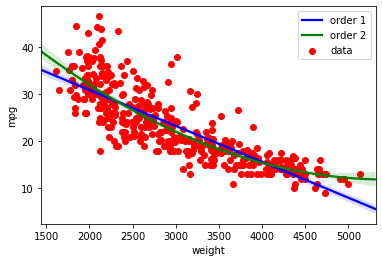

In [10]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='blue', scatter=None, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='green', scatter=None, order=2, label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()


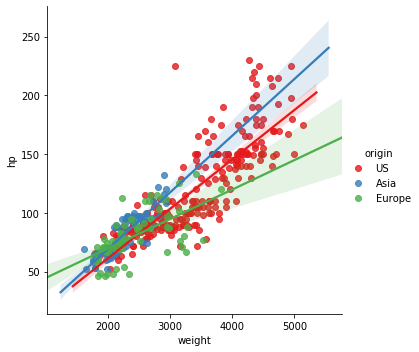

In [11]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot('weight','hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()

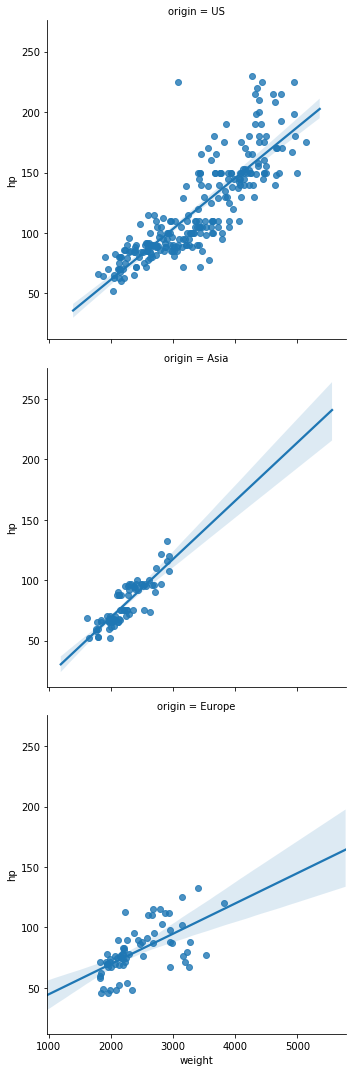

In [12]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot('weight','hp',data=auto,row='origin')

# Display the plot
plt.show()


# Constructing strip plots
Regressions are useful to understand relationships between two continuous variables. Often we want to explore how the distribution of a single continuous variable is affected by a second categorical variable. Seaborn provides a variety of plot types to perform these types of comparisons between univariate distributions.

The strip plot is one way of visualizing this kind of data. It plots the distribution of variables for each category as individual datapoints. For vertical strip plots (the default), distributions of continuous values are laid out parallel to the y-axis and the distinct categories are spaced out along the x-axis.

For example, `sns.stripplot(x='type', y='length', data=df)` produces a sequence of vertical strip plots of length distributions grouped by type (assuming length is a continuous column and type is a categorical column of the DataFrame df).
Overlapping points can be difficult to distinguish in strip plots. The argument jitter=True helps spread out overlapping points.
Other matplotlib arguments can be passed to `sns.stripplot()`, e.g., marker, color, size, etc.

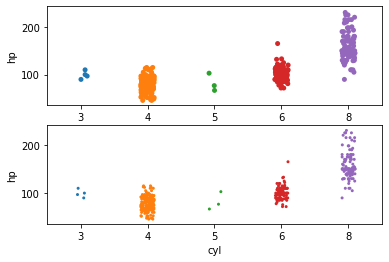

In [13]:
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto)

# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', size=3, jitter=True, data=auto)

# Display the plot
plt.show()


# Constructing swarm plots
As you have seen, a strip plot can be visually crowded even with jitter applied and smaller point sizes. An alternative is provided by the swarm plot (`sns.swarmplot()`), which is very similar but spreads out the points to avoid overlap and provides a better visual overview of the data.

The syntax for `sns.swarmplot()` is similar to that of sns.stripplot(), e.g., `sns.swarmplot(x='type', y='length', data=df)`.
The orientation for the continuous variable in the strip/swarm plot can be inferred from the choice of the columns x and y from the DataFrame data. The orientation can be set explicitly using `orient='h'` (horizontal) or `orient='v'` (vertical).
Another grouping can be added in using the hue keyword. For instance, using `sns.swarmplot(x='type', y='length', data=df, hue='build year')` makes a swarm plot from the DataFrame df with the 'length' column values spread out vertically, horizontally grouped by the column 'type' and each point colored by the categorical column 'build year'.

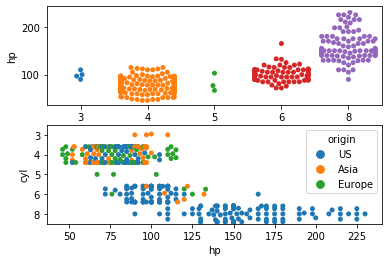

In [14]:
# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl',y='hp',data=auto)

# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp',y='cyl',data=auto,hue='origin',orient='h')

# Display the plot
plt.show()


# Constructing violin plots
Both strip and swarm plots visualize all the datapoints. For large datasets, this can result in significant overplotting. Therefore, it is often useful to use plot types which reduce a dataset to more descriptive statistics and provide a good summary of the data. Box and whisker plots are a classic way of summarizing univariate distributions but seaborn provides a more sophisticated extension of the standard box plot, called a violin plot.

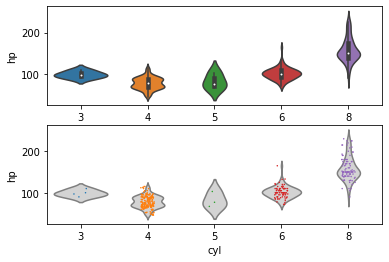

In [15]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto, color='lightgray',inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl', y='hp', data=auto, jitter=True, size=1.5)

# Display the plot
plt.show()

# Plotting joint distributions
There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

Seaborn's `sns.jointplot()` provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of `sns.lmplot()`. By default, calling `sns.jointplot(x, y, data)` renders a few things:

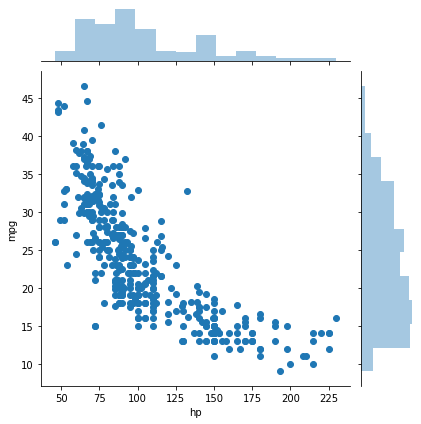

In [16]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot('hp','mpg',data=auto)

# Display the plot
plt.show()

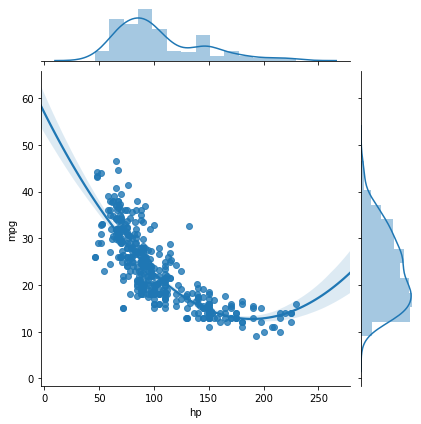

In [22]:
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot('hp','mpg',data=auto, kind='reg',order=2)

# Display the plot
plt.show()

The seaborn function `sns.jointplot()` has a parameter kind to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

- `kind='scatter'` uses a scatter plot of the data points
- `kind='reg'` uses a regression plot (default order 1)
- `kind='resid'` uses a residual plot
- `kind='kde'` uses a kernel density estimate of the joint distribution
- `kind='hex'` uses a hexbin plot of the joint distribution

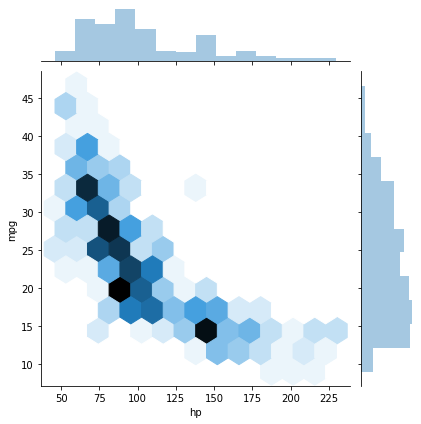

In [17]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(kind='hex',x='hp',y='mpg',data=auto)

# Display the plot
plt.show()

# Plotting distributions pairwise
Data sets often contain more than two continuous variables. The function `sns.jointplot()` is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function `sns.pairplot()` constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: sns.pairplot(df), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

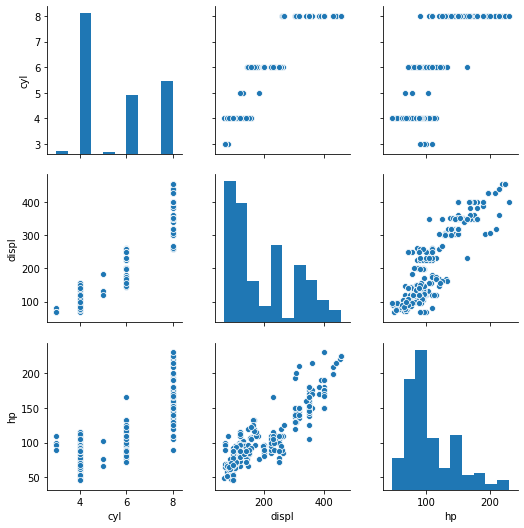

In [18]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto.iloc[:,1:4])

# Display the plot
plt.show()

# Plotting distributions pairwise
In this exercise, you will generate pairwise joint distributions again. This time, you will make two particular additions:

You will display regressions as well as scatter plots in the off-diagonal subplots. You will do this with the argument `kind='reg'` (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.
You will also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

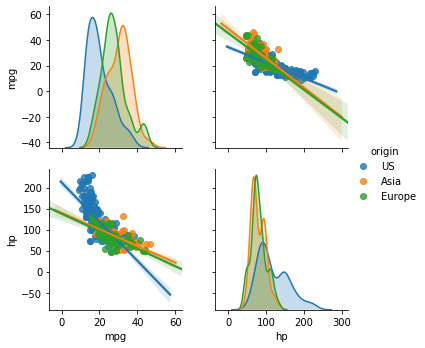

In [19]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto[['mpg','hp','origin']], kind='reg', hue='origin')

# Complex jointplots
The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the `JointGrid` plots on top of the standard `jointplot`. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

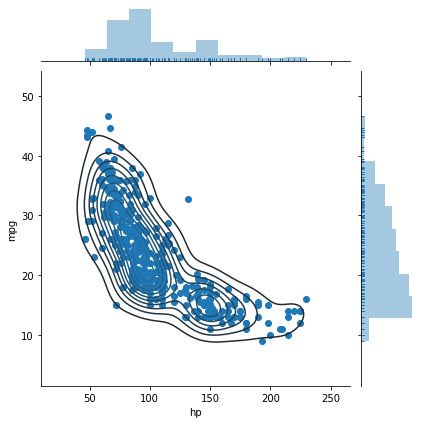

<Figure size 432x288 with 0 Axes>

In [23]:
g = (sns.jointplot(x="hp",
                   y="mpg",
                   kind='scatter',
                   data=auto,
                   marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

# Visualizing correlations with a heatmap
Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

In this exercise, you will view the covariance matrix between the continuous variables in the auto-mpg dataset. You do not have to know here how the covariance matrix is computed; the important point is that its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [20]:
auto.corr()

,mpg,cyl,displ,hp,weight,accel,yr,size
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.806682
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.890839
displ,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.928779
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.869720
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.992019
accel,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.426547
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.325214
size,-0.806682,0.890839,0.928779,0.869720,0.992019,-0.426547,-0.325214,1.000000


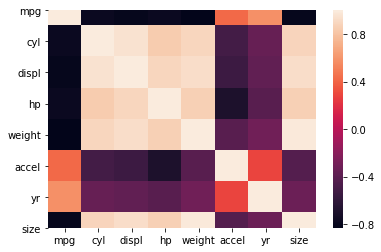

In [21]:
# Visualize the covariance matrix using a heatmap
sns.heatmap(auto.corr())

# Display the heatmap
plt.show()